# 第4章: 形態素解析

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](https://nlp100.github.io/data/neko.txt)）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39は[matplotlib](http://matplotlib.org/)もしくは[Gnuplot](http://www.gnuplot.info/)を用いるとよい．


In [ ]:
!wget https://nlp100.github.io/data/neko.txt

--2023-05-22 22:09:27--  https://nlp100.github.io/data/neko.txt
Resolving nlp100.github.io (nlp100.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to nlp100.github.io (nlp100.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 975789 (953K) [text/plain]
Saving to: ‘neko.txt’

neko.txt            100%[===================>] 952.92K  --.-KB/s    in 0.06s   

2023-05-22 22:09:28 (15.3 MB/s) - ‘neko.txt’ saved [975789/975789]



In [ ]:
!sudo apt install mecab libmecab-dev mecab-ipadic-utf8
!mecab neko.txt -o neko.txt.mecab

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libmecab2 mecab-ipadic mecab-utils
The following NEW packages will be installed:
  libmecab-dev libmecab2 mecab mecab-ipadic mecab-ipadic-utf8 mecab-utils
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,373 kB of archives.
After this operation, 60.4 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libmecab2 amd64 0.996-10build1 [233 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libmecab-dev amd64 0.996-10build1 [285 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 mecab-utils amd64 0.996-10build1 [4,912 B]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd64 mecab-ipadic all 2.7.0-20070801+main-2.1 [6,714 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal/universe amd64 mecab amd64 0.996-10build1 [132 kB]
Get:6 http://archive.ubuntu.c

## 30. 形態素解析結果の読み込み
---
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [ ]:
sentences = []
morphs = []
with open('./neko.txt.mecab') as f:
    for line in f:
        fields = line.split('\t')
        if line == 'EOS\n':
            sentences.append(morphs)
            morphs = []
        else:
            if len(fields) != 2 or fields[0] == '':
                continue
            else:
                attrs =  fields[1].split(',')
                morph = {'surface': fields[0], 'base': attrs[6], 'pos': attrs[0], 'pos1': attrs[1]}
                morphs.append(morph)

for morph in sentences[2]:
    print(morph)

{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}
{'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}
{'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}
{'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}
{'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}
{'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}
{'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}


## 31. 動詞Permalink
---
動詞の表層形をすべて抽出せよ．

In [ ]:
verb_surfaces = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            verb_surfaces.add(morph['surface'])

print(f'動詞の表層形の種類: {len(verb_surfaces)}\n')
for verb_surface in list(verb_surfaces)[:10]:
    print(verb_surface)

動詞の表層形の種類: 3893

潜れ
言い兼ね
懸け
浚い
組ん
価する
転じ
使う
守ら
住ん


## 32. 動詞の基本形
---
動詞の基本形をすべて抽出せよ．

In [ ]:
verb_bases = set()
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '動詞':
            verb_bases.add(morph['base'])

print(f'動詞の基本形の種類: {len(verb_bases)}\n')
for verb_base in list(verb_bases)[:10]:
    print(verb_base)

動詞の基本形の種類: 2300

捏ねる
価する
のびる
使う
もぎとる
どやす
ふざける
ひっくり返す
視る
錬る


## 33. 「AのB」
---
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [ ]:
noun_phrases = set()
for sentence in sentences:
    for i in range(len(sentence) - 2):
        if sentence[i]['pos'] == '名詞' and sentence[i+1]['surface'] == 'の' and sentence[i+2]['pos'] == '名詞':
            noun_phrases.add(sentence[i]['surface'] + sentence[i+1]['surface'] + sentence[i+2]['surface'])

print(f'「名詞＋の＋名詞」の種類: {len(noun_phrases)}\n')
for noun_phrase in list(noun_phrases)[:10]:
    print(noun_phrase)

「名詞＋の＋名詞」の種類: 4924

彼の制帽
方丈の食
彼の友
恋のふみ
枚の名刺
枚の絵
人のやり方
牛の足跡
間違いのもと
恐悦の体


## 34. 名詞の連接
---
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [ ]:
noun_chains = set()
noun_chain = []
for sentence in sentences:
    for morph in sentence:
        if morph['pos'] == '名詞':
            noun_chain.append(morph['surface'])
        else:
            if len(noun_chain) > 1:
                noun_chains.add(''.join(noun_chain))
            noun_chain = []
            
print(f'連説名詞の種類: {len(noun_chains)}\n')
for noun_chain in list(noun_chains)[:10]:
    print(noun_chain)

連説名詞の種類: 4457

鯱鉾町
自弁休養
君気
際吾輩
徐ろ
十五畳
住人多々良三平君
二信
自慢そう
放逐論


## 35. 単語の出現頻度
---
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
from collections import defaultdict

word_freqs = defaultdict(int)
for sentence in sentences:
    for morph in sentence:
        word_freqs[morph['surface']] += 1
word_freqs = sorted(word_freqs.items(), key=lambda x:x[1], reverse=True)

for word_freq in word_freqs[:10]:
    print(word_freq)

('の', 9194)
('。', 7486)
('て', 6868)
('、', 6772)
('は', 6420)
('に', 6243)
('を', 6071)
('と', 5508)
('が', 5337)
('た', 3988)


## 36. 頻度上位10語
---
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [ ]:
!pip install japanize_matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=22a4c1ad67af8e71ccda928c2fea1efd9ff0b1992ef3e1267bf158efc1913b88
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize_matplotlib


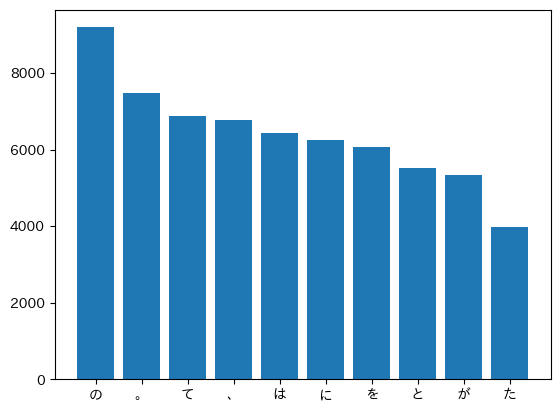

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib

keys = dict(word_freqs[:10]).keys()
values = dict(word_freqs[:10]).values()
plt.bar(keys, values)
plt.show()

## 37. 「猫」と共起頻度の高い上位10語
---
「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

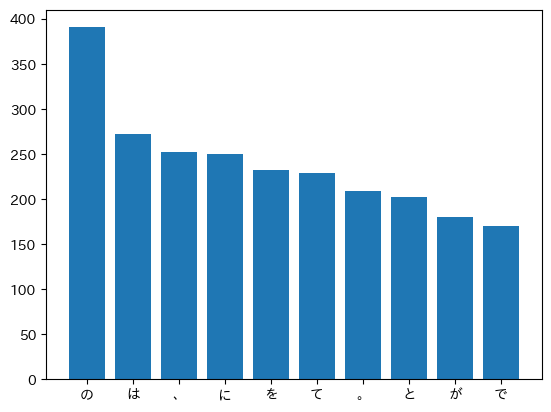

In [ ]:
cat_word_freqs = defaultdict(int)
for sentence in sentences:
    if '猫' in [morph['base'] for morph in sentence]:
        for morph in sentence:
            cat_word_freqs[morph['surface']] += 1
del cat_word_freqs['猫']
cat_word_freqs = sorted(cat_word_freqs.items(), key=lambda x:x[1], reverse=True)

keys = dict(cat_word_freqs[:10]).keys()
values = dict(cat_word_freqs[:10]).values()
plt.bar(keys, values)
plt.show()

## 38. ヒストグラム
---
単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

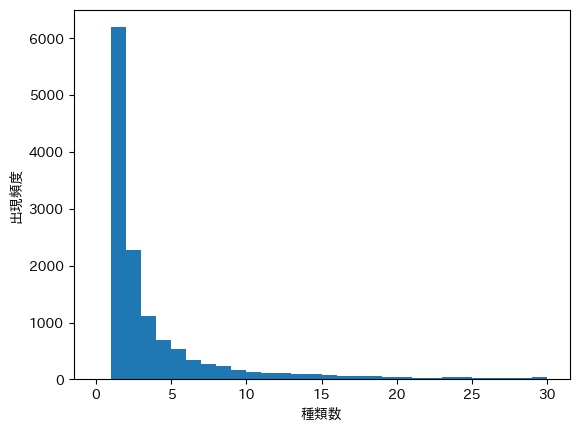

In [ ]:
plt.hist(dict(word_freqs).values(), bins=30, range=(0, 30))
plt.xlabel('種類数')
plt.ylabel('出現頻度')
plt.show()

## 39. Zipfの法則
---
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

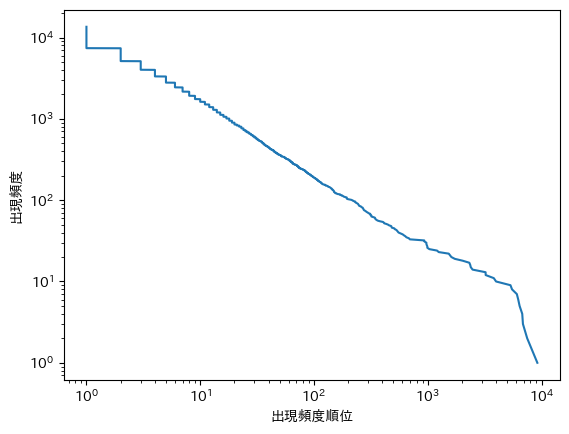

In [ ]:
plt.plot(dict(word_freqs).values(), range(1, len(word_freqs)+1))
plt.xlabel('出現頻度順位')
plt.ylabel('出現頻度')
plt.xscale('log')
plt.yscale('log')
plt.show()